<a href="https://colab.research.google.com/github/pcarbo/qBio9_stuff/blob/main/basic_computing_qbio9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Peter Carbonetto<br>
University of Chicago<br>
Chicago, IL<br>
*Last modified on August 8, 2023*

How this tutorial is organized
==============================

This tutorial is divided into three parts:

+ In the first part, you will get comfortable with analyzing a (small) data set in R in two different computing spaces: (a) in a Jupyter notebook interface "in the cloud" (to be more precise, using a virtual machine provided by the Google Colab service), and (b) in RStudio on your laptop. This focus of this first part is understanding an important data structure in R, *the data frame*: what it is, how to use it, and understanding why it is so integral to performing data analyzes in R.

+ In the second part, you will apply the skills developed in Part 1 to a (much) larger data set. One of the takeaways of this second part is that analyzing a very large data set in R is not much different than analyzing a small data set (both are data frames).

+ In third part, you will improve your plotting skills in R, first for analyzing a small data set (but nonetheless very real data set from a *Genetics* paper), and later on a larger more complex data set (these data were from a *Nature Genetics* paper). For this, you will learn how to use a very powerful and widely used R package called ggplot2. (Data frames are again a central to ggplot2.)

Some initial notes about computing
==================================

The first computer I learned to program on was an [Apple IIc](https://en.wikipedia.org/wiki/Apple_IIc). Things have changed a lot since then:

+ Computing has become *highly distributed and interconnected.* (Most likely, a lot of the data for your research will be stored in computers that are very far away from you, and yet you can access these data in seconds. And you can even *analyze your data* on computers far away that you cannot see or touch.)

+ The world of computing has expanded enormously in scope and variety, and [computing technology continues to change rapidly](https://catalog.lib.uchicago.edu/vufind/Record/10996185).

+ [Interactive programming](https://py.mit.edu/spring23/labs/lisp_1) (MATLAB, R, Python, Spark, *etc*) has become a predominant mode for doing computing, in particular for analyzing data.

+ Scientific computing tools, data sets and publications are increasingly **open**. (See [the NIH's new policy on sharing data](https://oir.nih.gov/sourcebook/intramural-program-oversight/intramural-data-sharing/2023-nih-data-management-sharing-policy).)

How should we navigate this complex computing world for our research?

+ **As scientists** navigating this complex computing world, we should strive to understand, and check that our understanding is correct.

+ Learn the fundamentals, not just the specifics of the transitory technologies.

+ Simple tools and workflows are *more robust* than complex tools and workflows.

+ Be intentional in using tools: which will actually help me do good research and help me contribute to science?

+ Make your work *human accessible*. This is now more important than ever. (See: HTML, git, [workflowr](https://doi.org/10.12688/f1000research.20843.1)).

+ Learn from your colleages and peers (no single person is an authority).

What in the **bleep** *is* this document?
=========================================

This is a *jupyter notebook.*

A "jupyter notebook", confusingly, means two different things!

One meaning: it is a document or a file, like a Word document or CSV file. This is a document divided into *cells*; each cell contains some code and results (numerical results, plots, *etc*) generated by running this code. (I call them "chunks" instead of "cells", but the idea is the same.)

This document can encode other types of information:
formatted text ([Markdown](https://daringfireball.net/projects/markdown/syntax)), mathematical equations, *etc*---in other words, the many of the types of information that you might want to document for your research!

The information notebook is encoded in an open file format called [XML](https://github.com/pcarbo/qBio9_stuff/blob/main/basic_computing_qbio9.ipynb?short_path=481ca6b).

But the Jupyter notebook file format is now also widely recognized, so for example [GitHub will show the contents of a Jupyter notebook in a more accessible and evocative way](https://github.com/pcarbo/qBio9_stuff/blob/main/basic_computing_qbio9.ipynb).

The other meaning of Jupyter notebook: it is an **IDE** (short for "integrated development environment"). In short, it is a particular interface for doing your data analysis. You can access this IDE in Google Colab, or you can download this IDE on your computer [here](https://jupyter.org).

Jupyter notebook IDE is different from the RStudio IDE; Each IDE has its benefits and limitations. *No single IDE is "best".*

How should I use this document?
===============================

Perhaps the simplest thing you can do is copy and paste chunks code, one cell at a time, into R, or into the Console in RStudio, and examine the outputs.
(Please try this!)

And of course you can open up this document in Jupyter notebook IDE and run the code it there. This would be more elegant than the copy-and-paste approach, but not necessarily "better".

Quite remarkably, to start up a *virtual machine that runs on a server operated by Google.* Even more remarkably, this is done simply by open this link in your favourite browser:

https://colab.research.google.com/github/pcarbo/qBio9_stuff/blob/main/basic_computing_qbio9.ipynb

Once you have done this, run these two lines of code to check that you have a working virtual machine. (Yes, please do this!)

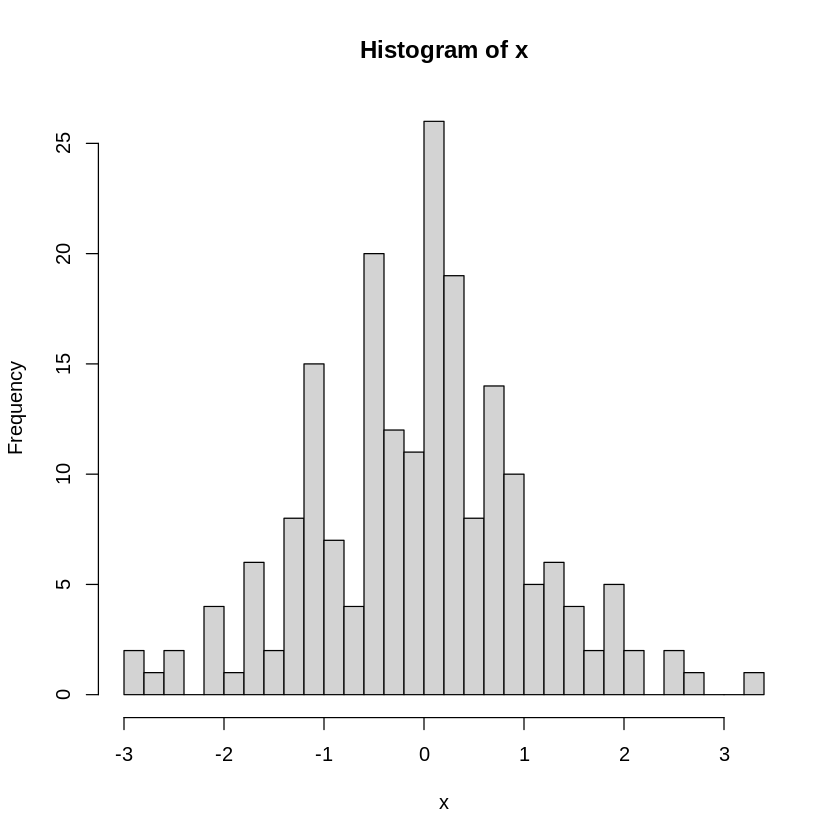

In [ ]:
x <- rnorm(200)
hist(x,n = 32)

You may notice that your histogram is not the same as mine. Why not? How can we ensure that they are the same?

**Note:** I run this every time in Jupyter notebook or Google Colab to make the code outputs look like they do in RStudio.

In [20]:
options(jupyter.rich_display = FALSE)

An invitation
=============

My Jupyter notebook is *an invitation* to enter my computing environment and run the computations *exactly as I did*. So I am not only sharing the code, the data, and the results produced by the code and data, but also the *computing context* in which the data analysis was developed.

My data analysis, briefly
=========================

Here is my data analysis. It is an analysis of data from a [2008 *Genetics* article](https://doi.org/10.1534/genetics.108.087866) on the genetics of dog breeds. We will use this analysis as a jumping point to learn about R. But before we try to understand what the code is doing, let's start by *trying to run the code and reproduce the analysis.*

The code is split into two chunks.

The first code chunk retrieves  what we need (the data and the R packages) to run the analysis:

In [2]:
system("wget https://raw.githubusercontent.com/pcarbo/qBio9_stuff/main/dogs.csv")
list.files()
install.packages("ggplot2")
install.packages("ggrepel")
install.packages("cowplot")
install.packages("repr")

[1] "dogs.csv"    "dogs.csv.1"  "sample_data"

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



The second chunk runs the analysis:


Call:
lm(formula = aod ~ weight, data = dogs)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0786 -0.7385  0.1788  1.0208  3.3865 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.113398   0.216519   65.18   <2e-16 ***
weight      -0.035704   0.003557  -10.04   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.395 on 118 degrees of freedom
Multiple R-squared:  0.4605,	Adjusted R-squared:  0.456 
F-statistic: 100.7 on 1 and 118 DF,  p-value: < 2.2e-16


Warning message:
“ggrepel: 75 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


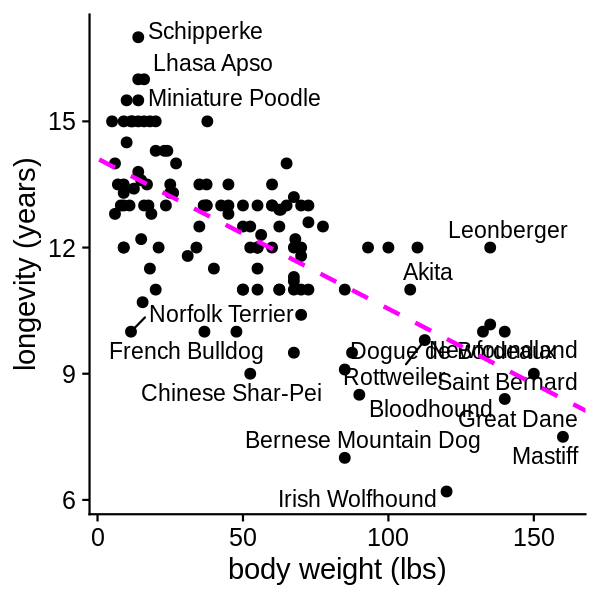

In [5]:
library("ggplot2")
library("ggrepel")
library("cowplot")
library("repr")
dogs <- read.csv("dogs.csv",stringsAsFactors = FALSE)
fit <- lm(aod ~ weight,dogs)
summary(fit)
a <- coef(fit)["weight"]
b <- coef(fit)["(Intercept)"]
options(repr.plot.width = 4,repr.plot.height = 4,repr.plot.res = 150)
p <- ggplot(dogs,aes(x = weight,y = aod,label = breed)) +
  geom_point(size = 2) +
  geom_text_repel() +
  geom_abline(slope = a,intercept = b,col = "magenta",
              linewidth = 1,linetype = "dashed") +
  labs(x = "body weight (lbs)",y = "longevity (years)") +
  theme_cowplot()
p

I hope you were able to run the analysis successfully! Try running it in Google Colab and in RStudio.

Now we will run the *same analysis again*. But this time we will do so more carefully and try to understand what each line of code does.

First, let's clear the variables from our R environment to start the analysis with a fresh environment.

In [3]:
rm(list = ls())

A data analysis, in detail
==========================

Let's now carefully walk through the analysis of the dogs data.

Retrieve the data
-----------------

A key ingredient of course is the data set. I put the data set in the same GitHub repository where this Jupyter notebook is stored. We need to copy it to the virtual machine to use it here. There are a number of ways to do this. I chose to use the shell command "wget" to be transparent about what is going on: (1) wget downloads the file to R's working directory; (2) the working directory is currently `/content`.

In [1]:
getwd()
system("wget https://raw.githubusercontent.com/pcarbo/qBio9_stuff/main/dogs.csv")
list.files()

[1] "/content"

[1] "dogs.csv"    "sample_data"

Install packages
----------------

Next, we download and install some R packages from CRAN. This only needs to be done once (so we don't really need to do again since we already did it above).

In [2]:
install.packages("ggplot2")
install.packages("ggrepel")
install.packages("cowplot")
install.packages("repr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Load packages
-------------

The functions and other resources in an R package are not available to us in our current session until we tell R that we want to use the package:

In [3]:
library("ggplot2")
library("ggrepel")
library("cowplot")
library("repr")

Although we don't make use of these packages immediately, it is good practice to load the packages at the beginning so that we are upfront about what we need to run the analysis. This is part of a larger theme about *documenting the minimum requirements for an analysis.* The `sessionInfo()` function gives us more info about our computing environment, and which R packages were used in the analysis:

In [4]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 22.04.2 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] repr_1.1.6    cowplot_1.1.1 ggrepel_0.9.3 ggplot2_3.4.2

loaded via a namespace (and not attached):
 [1] crayon_1.5.2     vctrs_0.6.3      cli_3.6.1        rlang_1.1.

You may have figured this out already, nonetheless it is important to note that the *order in which you run the code chunks matters.* The convention in a Jupyter notebook is that code chunks are executed from top to bottom, and you should follow this convention when designing your notebook. But (surprisingly!) Jupyter does not stop you from trying to execute the code chunks in a different order, and this becomes a frequent source of confusion.  

Import the data into R as a data frame
--------------------------------------

The dogs data are stored in a [CSV file](https://github.com/pcarbo/qBio9_stuff/blob/main/dogs.csv). We use the `read.csv` function to *import the data into a data structure that is convenient for analysis in R.* (Note this command will only work if your R working directory is the same as the directory containing `dogs.csv`.) Although this is a single line of code, there is a lot going on under the surface.

In [5]:
dogs <- read.csv("dogs.csv",stringsAsFactors = FALSE)

Let's deconstruct what we did:

1. We called function `read.csv`. This is a flexible function that can do many, many things, and has many options. To learn more, run `help(read.csv)`. For now, it suffices to know that we set the "file" argument to `"dogs.csv"`, and we set the `stringsAsFactors` argument to FALSE. (In time we will understand why, but to understand why we will first need to understand what *factors* are.)

2. The output of `read.csv` is assigned to an object in our R environment which we have called "dogs". If the object does not exist already, it is created. If it does exist, it is overwritten. A common mistake is to forget to assign the output. *What happens if we forget to do that?*

In [ ]:
read.csv("dogs.csv",stringsAsFactors = FALSE)

What if we had not used the double quotes for `"dogs.csv"`?

In [ ]:
dogs <- read.csv(dogs.csv,stringsAsFactors = FALSE)

What is this object? To find out, we can print out its contents:

In [ ]:
dogs

Or we can *summarize* its contents:

In [ ]:
summary(dogs)

    breed                aod            height          weight      
 Length:120         Min.   : 6.20   Min.   : 6.00   Min.   :  5.00  
 Class :character   1st Qu.:11.15   1st Qu.:13.00   1st Qu.: 17.38  
 Mode  :character   Median :12.55   Median :19.00   Median : 46.38  
                    Mean   :12.36   Mean   :18.73   Mean   : 49.23  
                    3rd Qu.:13.50   3rd Qu.:24.62   3rd Qu.: 67.50  
                    Max.   :17.00   Max.   :32.00   Max.   :160.00  
                                                                    
   shortcoat      cfa7_46696633bp 
 Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.3455  
 Median :0.0000   Median :0.6880  
 Mean   :0.3043   Mean   :0.6054  
 3rd Qu.:1.0000   3rd Qu.:0.8800  
 Max.   :1.0000   Max.   :1.0000  
 NA's   :5        NA's   :1       

`read.csv` in fact outputs a very special object called a *data frame:*

In [ ]:
class(dogs)

[1] "data.frame"

A data frame is R's main data structure for *storing tabular data.* The data frame is one of the most important data structures in R, and is important enough that we will spend much of this tutorial seeking to understand how to work with and analyze data in data frames. (Not all data of course is tabular data, but because so many things in R work well with data frames, it can be helpful to find ways to rework your data so that it fits into a data frame.)

If you are used to the "point-and-click" way of doing things (e.g., in Excel), it may seem silly to have arrived at this point where we have written a bunch of code, and all we have done is printed the contents of the CSV to the screen. The advantages of R are less obvious when working with a small
data set. Later, we will work with a larger data set.

Perform a linear regression
---------------------------

The data frame contains a lot of interesting data. I was particularly interested in studying the relationship between a breed's size (using the "weight" column) and the expected longevity (using the "aod" column, short for "age of death"). I used the `lm` function in R, which can be thought of as R's "Swiss army knife" for performing linear regression. ("lm" is short for "linear model", so `lm` is the main function in R for *fitting linear models.*)

In [7]:
fit <- lm(aod ~ weight,dogs)

The output from `lm` is a particularly complex "lm" object:

In [8]:
class(fit)

[1] "lm"

Nonetheless, the `summary` function works on the output to give us lots of useful information about how the regression was conducted, and summarizes the key results:

In [9]:
summary(fit)


Call:
lm(formula = aod ~ weight, data = dogs)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0786 -0.7385  0.1788  1.0208  3.3865 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.113398   0.216519   65.18   <2e-16 ***
weight      -0.035704   0.003557  -10.04   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.395 on 118 degrees of freedom
Multiple R-squared:  0.4605,	Adjusted R-squared:  0.456 
F-statistic: 100.7 on 1 and 118 DF,  p-value: < 2.2e-16


There are other more specialized functions that work with `lm` (and other statistical modeling functions). For example `coef` extracts a vector containing the least-squares estimates of the coefficients:

In [10]:
coef(fit)

(Intercept)      weight 
14.11339789 -0.03570375

Learning to use `lm` is a mini-expertise in itself—many of you may have done a lot of coding R without ever using `lm`. You can of course learn about `lm` by running `help(lm)`, which opens up the official documentation, but if you are using it for the first time, it is more helpful to learn from some tutorials. For example, I first learned by reading Chapter 6 from Peter Dalgaard's book,
[Introductory Statistics with R](https://catalog.lib.uchicago.edu/vufind/Record/11957555). `lm` has many, many options (i.e., Swiss army knife), with many "helper functions" (e.g., `coef`, `fitted`). And course beyond knowing how to use the `lm` function, you also need to have some intuition for the statistical ideas, such as what it means to "fit" a linear regression to data, and what the confidence intervals and *p*-values represent.

Our call `lm` call is illustrative of many things in R that involve a mini-expertise. There will be some R functions that will be particularly important to your work, and you will become a "mini-expert" in those functions. For example, if you work with single-cell data, you might gain an expertise in the `umap` function from [the uwot package](https://github.com/jlmelville/uwot) to visualize your data.

The World of R is now so vast that none of us can possibly be experts in all areas of R. Helpfully, much of the knowledge in R is transferrable. Even if you didn't understand the syntax in the call to `lm`—and I did not expect you to!—many of the basic rules of R still apply; for example, `summary` worked on the `lm` output.

Visualize the linear regression result
--------------------------------------

Almost any data analysis includes some sort of visualization. One particularly powerful way to visualize your data analysis is to combine the data with the results of your analysis (the fit of the linear model), as we do here.

Warning message:
“ggrepel: 75 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


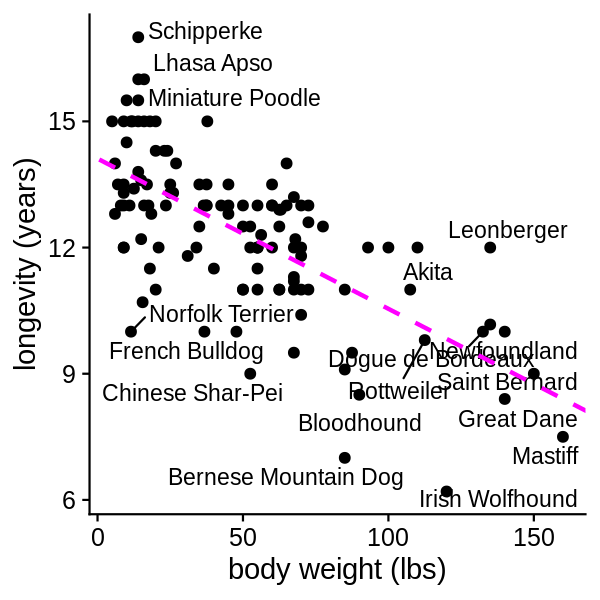

In [11]:
a <- coef(fit)["weight"]
b <- coef(fit)["(Intercept)"]
options(repr.plot.width = 4,repr.plot.height = 4,repr.plot.res = 150)
p <- ggplot(dogs,aes(x = weight,y = aod,label = breed)) +
  geom_point(size = 2) +
  geom_text_repel() +
  geom_abline(slope = a,intercept = b,col = "magenta",
              linewidth = 1,linetype = "dashed") +
  labs(x = "body weight (lbs)",y = "longevity (years)") +
  theme_cowplot()
p

This plot shows how well the line fits the data, and highlights *outliers*, that is the breeds that are furthest away from the trend line.

Let's talk about this code. Again, this code looks very different from other R code. Indeed, this syntax is particular to the [ggplot2 package](ggplot2.tidyverse.org). We will learn more about ggplot2 later.

In fact, this code actually uses three different packages: ggplot2, and two packages *that extend ggplot2*, cowplot and ggrepel.

This illustrates that R code, even only a few lines of code, can quickly get quite complex, involving the interplay of multiple R packages, each of which has its own learning curve. The lesson here is that R code exists along a spectrum of complexity, from simple lines of code that involve the basic syntax to complex lines of code that involve specialized packages and many-featured functions. The latter will take more time and patience to get comfortable with.

Tending to your "gaRden"
========================

A Jupyter notebook proceeds in a linear fashion, building your analysis over time: it starts with loading the packages, importing the data, perhaps some steps to prepare your data for the more complex analyses, executing the analyss, followed by visualization and interpretation.

The problem is that it hides a lot of *what is actually going on.* What is actually going on is that every line of code is acting on your R environment: it is taking objects that are already in your environment, and using them to generate new objects, or modify existing objects. I think of this as "tending to your gaRden" (your R environment is the garden, and the objects are the fruits, vegetables and flowers in your garden).

To understand any line of code, you need to understand not only the code itself, but also what is *the state of your environment (your "garden") the moment before you run your code:* the objects that are in your environment and what they represent. This aspect is unfortunately hidden from your Jupyter notebook, and therefore an important skill as a coder is to *tend to your garden.*

The `objects` function lists the names of the objects in your environment:

In [12]:
objects()

[1] "a"    "b"    "dogs" "fit"  "p"

*What are these objects?*

*How could we have named these objects to better remind us what these objects are?*

*Are some of these objects "more important" than others? What makes some objects more important and others less important?*

Mini-Practice: Create a Jupyter notebook in Google Colab
========================================================

Let's now try out some basic cloud computing skills. I want you to create, from scratch, your own notebook in Google Colab, add a few text cells and code cells. The aim is to reproduce the analysis of the dogs data above. Then save your notebook in Google Drive.

Next, modify your notebook to instead analyze the slightly larger ["more dogs" data set](https://github.com/pcarbo/qBio9_stuff/blob/main/dogs_more.csv) that has data about a few more dog breeds. Then save your notebook in Google Drive.

**Optional exercise:** Save a copy of your notebook in a git repository on GitHub, and include a link in your notebook so that others (and you) may easily start up their own virtual machine using the notebook that you created.

A brief tour of RStudio
=======================

RStudio is an Integrated Development Environment (IDE) for R. The RStudio interface is split up into "panels", which include:

1. **Console:** This is a panel containing an instance of R. For this
tutorial, we will work mainly in this panel.

2. **Source:** In this panel, you can write your code and save it to a
file. The code and also be run from this panel, but the actual results
show up in the console.

3. **Environment:** This panel lists all the variables (objects) you
created in your R environment.

4. **History:** This gives you the history of the commands you typed.

5. **Plots:** This panel shows you all the plots you drew.

Other tabs allow you to access the list of packages you have loaded,
and the help page for commands (e.g., type `help(p.adjust)` in the
console).

Another Mini-Practice: Create an R script in RStudio
====================================================

Now let's try to reproduce our analysis of the "dogs" data in RStudio on our computer. In this exercise, we will create an *R script* in RStudio to analyze the data from `dogs.csv`. An R script is different from a Jupyter notebook because it only *stores the code* (except for "comments"—accompanying text can be stored in comments).

**Note:** You do not need to include steps to the install the packages and download the CSV file; you can perform those steps separately.

You may find that there are some differences between running the code on a Google Colab virtual machine and running the code in RStudio on your computer. What did you have to do differently in RStudio?

Once you have created a working script, and have saved it somewhere on your computer, we will discuss different strategies for saving the results of our analysis in R.

**Question:** Now consider modifying your script to analyze the "more dogs" data set. What changes do you need to make to your script to analyze this slightly larger data set, [dogs_more.csv](https://github.com/pcarbo/qBio9_stuff/blob/main/dogs_more.csv)?

**Optional exercise:** Implement your analysis of the dogs data as an [R Markdown document](https://kbroman.org/knitr_knutshell/).

Mini-Lab: Understanding and working with data frames
====================================================

*For this part of the tutorial, I recommend using RStudio. I find it works
better than a Jupyter notebook for freeform exploration.*

The data frame is R's way of storing tabular data. It is one of the most important and more powerful data structures in R. In this part of the tutorial, we will take some time to understand data frames and how to work with them. Although our focus here is on data frames, many of the ideas translate to other data structures in R.

I've divided this Mini-Lab into three parts:

1. **Inspecting the data frame.** First we will learn how to use some basic commands to view different parts of the data frame.

2. **Deconstructing the data frame.** We will take a closer look at the laptops data frame.

3. **Programming Challenge:** We will put our new skills to work to solve some programming exercises involving the dogs data.

Let's start this part of the tutorial with a clean environment:

In [ ]:
rm(list = ls())

Now download and import the larger dogs data set:

In [ ]:
system("wget https://raw.githubusercontent.com/pcarbo/qBio9_stuff/main/dogs_more.csv")
dogs <- read.csv("dogs_more.csv",stringsAsFactors = FALSE)

To remind ourselves, let's print out the first few rows of the table:

In [13]:
head(dogs)

,breed,aod,height,weight,shortcoat,cfa7_46696633bp
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,Affenpinscher,13.0,10.25,8.0,0,0.375
2,Afghan Hound,12.0,27.00,60.0,0,0.933
3,Akita,11.0,27.00,107.5,0,0.750
4,American Pit Bull Terrier,11.0,19.50,62.5,NA,1.000
5,Australian Cattle Dog,13.5,19.00,45.0,1,0.917
6,Australian Shepherd,13.0,21.50,60.0,0,0.714


On the surface, the data frame looks like a spreadsheet you might load into Excel. But it is actually an example of a data structure with a very specific form:

*The data frame is a set of columns, and each column is a vector of the same length.*

Let's run some code to convince ourselves of these facts.

First, for convenience, make a copy of the first column, and call it "x":

In [14]:
x <- dogs$breed

(Note that this makes a *copy* of the original data, so if you were to modify or delete `x`, this leaves `dogs` unchanged.)

This is a "character" data type. It is R's way of storing text data:

In [16]:
class(x)
length(x)
x

[1] "character"

[1] 120

[1] "Affenpinscher"                      "Afghan Hound"                      
  [3] "Akita"                              "American Pit Bull Terrier"         
  [5] "Australian Cattle Dog"              "Australian Shepherd"               
  [7] "Australian Terrier"                 "Bassett Hound"                     
  [9] "Beagle"                             "Bearded Collie"                    
 [11] "Bedlington Terrier"                 "Belgian Malinois"                  
 [13] "Belgian Sheepdog"                   "Belgian Tervuren"                  
 [15] "Bernese Mountain Dog"               "Bichon Frise"                      
 [17] "Black Russian Terrier"              "Bloodhound"                        
 [19] "Border Terrier"                     "Boston Terrier"                    
 [21] "Boxer"                              "Briard"                            
 [23] "Brittany"                           "Brussels Griffon"                  
 [25] "Bull Terrier"                       "Cavalier King Charles Spaniel"     
 [27] "Cesky Terrier"                      "Chesapeake Bay Retriever"          
 [29] "Chinese Crested"                    "Chinese Shar-Pei"                  
 [31] "Chow Chow"                          "Clumber Spaniel"                   
 [33] "Collie"                             "Dachshund"                         
 [35] "Dalmatian"                          "Dandie Dinmont Terrier"            
 [37] "Dogue de Bordeaux"                  "English Bulldog"                   
 [39] "English Cocker Spaniel"             "English Setter"                    
 [41] "English Springer Spaniel"           "Field Spaniel"                     
 [43] "Flat Coated Retriever"              "Fox Terrier"                       
 [45] "Fox Terrier toy"                    "French Bulldog"                    
 [47] "German Wirehaired Pointer"          "Giant Schnauzer"                   
 [49] "Glen of Imaal Terrier"              "Golden Retriever"                  
 [51] "Gordon Setter"                      "Great Dane"                        
 [53] "Greater Swiss Mountain Dog"         "Greyhound"                         
 [55] "Havanese"                           "Hungarian Vizsla"                  
 [57] "Ibizan Hound"                       "Irish Red and White Setter"        
 [59] "Irish Setter"                       "Irish Terrier"                     
 [61] "Irish Wolfhound"                    "Italian Greyhound"                 
 [63] "Italian Spinone"                    "Jack Russell Terrier"              
 [65] "Japanese Chin"                      "Japanese Shiba Inu"                
 [67] "Keeshond"                           "Kerry Blue Terrier"                
 [69] "Komondor"                           "Labrador Retriever"                
 [71] "Lakeland Terrier"                   "Leonberger"                        
 [73] "Lhasa Apso"                         "Maltese"                           
 [75] "Manchester Terrier"                 "Mastiff"                           
 [77] "Miniature Bull Terrier"             "Miniature Pinscher"                
 [79] "Miniature Poodle"                   "Miniature Schnauzer"               
 [81] "Newfoundland"                       "Norfolk Terrier"                   
 [83] "Norwegian Elkhound"                 "Norwich Terrier"                   
 [85] "Nova Scotia Duck Tolling Retriever" "Pekingese"                         
 [87] "Pembroke Welsh Corgi"               "Petit Basset Griffon Vendeen"      
 [89] "Pit Bull Terrier"                   "Pointer"                           
 [91] "Pomeranian"                         "Poodle"                            
 [93] "Portuguese Water Dog"               "Pug"                               
 [95] "Pyrenean Mountain Dog"              "Rhodesian Ridgeback"               
 [97] "Rottweiler"                         "Saint Bernard"                     
 [99] "Saluki"                             "Samoyed"                           
[1

Note we could have also copied the first column this way:

In [17]:
x <- dogs[,"breed"]

And here's another way!

In [18]:
x <- dogs[,1]

You will quickly learn that there are usually several ways to accomplish the same thing in R. *Which way do you prefer?*

What makes the data frame a particularly powerful data structure *is that the vectors may contain different types of data.*

By storing tabular data in this way, we can **divide and conquer**: since each column is also an object in its own right, if the data are too complicated to understand all at once, we can make a copy of the columns we want to look at more closely, then run code on the copies, like we just did for the "breed" column. Make note: this is a useful strategy for dealing with complex data sets.

To drive home this idea of a data frame as a collection of vectors, the way to *create* a data frame is in fact to join together a bunch of vectors of the same length. For example:

In [21]:
dogs_new <- data.frame(
  breed = dogs$breed,
  lbs = dogs$weight,
  years = dogs$aod)
head(dogs_new)

  breed                     lbs   years
1 Affenpinscher               8.0 13.0 
2 Afghan Hound               60.0 12.0 
3 Akita                     107.5 11.0 
4 American Pit Bull Terrier  62.5 11.0 
5 Australian Cattle Dog      45.0 13.5 
6 Australian Shepherd        60.0 13.0 

Each data structure in R has its own features and its own techniques for working with them. In time, you will learn to work with other types of data structures, some that are used widely (e.g., an "lm" object), and some that are very specialized (e.g., a [GRanges](https://www.bioconductor.org/packages/release/bioc/vignettes/GenomicRanges/inst/doc/GenomicRangesIntroduction.html) object).

Now that we have some basic understanding of what is a data frame, let's jump into our first Programming Challenge: the goal is to write code to answer some  basic questions about dog breeds from the data. The challenges will get progressively more difficult, and will build on each other, so try not to rush through them. Sometimes the code will be given to you, other times you will be given hints for writing the code to answer the questions. Now, this data set is small enough that you can answer many of these questions by eye, but please don't do that. (That being said, you are welcome to look at the data to verify your answers.)

Programming Challenge: Facts about dog breeds
=============================================


Team strategy
-------------

Before diving deeply into the Programming Challenges, first discuss a collaboration strategy with your teammates. Some important issues to resolve among your teammates include:

1. How will you work together on problems (you may want to consider forming small groupers of 2 or 3 people---it is difficult to code collaboratively with more than 2 or 3 people).

2. What IDE(s) will you use?

3. How will you share solutions amongst the team?

4. How will you make sure everyone is included in the problem solving?

5. What will you do when your team comes up with more than one solution?

Warmup: Smallest and largest dog breeds
---------------------------------------

This should calculate the average height (in inches) of the largest dog breed:

In [22]:
x <- dogs$height
max(x)

[1] 32

Now write code to calculate the (average) height of the smallest dog breed:

In [23]:
min(x)

[1] 6

This didn't tell us *which* breeds were the smallest and largest. For example, to find the largest breed, we can do this:

In [24]:
y <- dogs$breed
i <- which.max(x)
y[i]

[1] "Great Dane"

The output of `which.max` was stored in object "i". How would you describe this object?

What is the smallest breed?

In [27]:
y <- dogs$breed
i <- which.min(x)
y[i]

[1] "Yorkshire Terrier"

What objects did you create to answer this question? *Describe the contents of these objects, and what data types they are.*

Facts about dogs' BMI
---------------------

The body-mass index (BMI) is a standard quantity—and sometimes misused quantity!—in science and medicine. In R, the BMI is easily calculated:

In [30]:
w <- dogs$weight
h <- dogs$height
bmi <- 703*w/h^2

Based on this code, what is the mathematical formula for BMI?

Next, write some code to find the largest, smallest, mean and median BMI. What are the dog breeds with the largest and smallest BMI?

In [31]:
max(bmi)
min(bmi)
mean(bmi)
median(bmi)
i <- which.max(bmi)
dogs$breed[i]
i <- which.min(bmi)
dogs$breed[i]

[1] 215.2041

[1] 42.18

[1] 88.32157

[1] 82.57299

[1] "Dachshund"

[1] "Fox Terrier toy"

When performing a statistical analysis, it is common to *transform* the (numeric) data. For example, this would be a square-root transformation of the BMI values:

In [32]:
x <- sqrt(bmi)

There are many reasons to do a transformation. One reason is to produce data that better fits the normal distribution. For example, we can check that the BMI data are normally distributed by comparing the quantiles:

In [33]:
a <- quantile(rnorm(1e4))
b <- quantile(bmi)
cor(a,b)

[1] 0.9244747

Now write similar code to check whether a *square-root* and *logarithmic* (`log`) transformation of the BMI data are a better fit to the normal distribution.

In [34]:
x <- sqrt(bmi)
b <- quantile(x)
cor(a,b)
x <- log(bmi)
b <- quantile(x)
cor(a,b)

[1] 0.9612894

[1] 0.9890064

Based on your results, which transformation provides the best fit to the normal: square-root, logarithm, or "identity" (no transformation)?

**Note:** If you would like to use the BMI data later on, you can easily add them to the data frame:

In [35]:
dogs$bmi <- bmi

*What would be the benefit of adding these data to the data frame (as opposed to storing the BMI data in a separate object)?*

The longest-living dog breeds
-----------------------------

In the dogs data frame we encountered two types of data: numeric data and text data. Another type of data that is very important is *logical data.* Although the data frame does not contain logical data, we can easily create logical data using logical operators. For example:

In [37]:
x <- dogs$aod >= 16
class(x)
summary(x)

[1] "logical"

   Mode   FALSE    TRUE 
logical     117       3 

*What did this code do? What does x contain?*

To get the indices that are "TRUE", use `which`:

In [39]:
i <- which(x)
length(i)
i
y <- dogs$breed
y[i]

[1] 3

[1]  73  79 101

[1] "Lhasa Apso"       "Miniature Poodle" "Schipperke"      

What to objects i and y contain?

Other logical operators include equals (`==`), and (`&`), or (`|`) and not (`!`). Running `help(Logic)` will give you a longer list.

Now write similar code to find the breeds with the following characteristics:

1. Expected age of death (AOD) at least 15 and average weight greater than 20 lbs.

2. AOD greater than 15 and "shortcoat" value of 1. (Later we will learn what the "shortcoat" column represents.)

In [40]:
x <- dogs$aod >= 15 & dogs$weight >= 20
i <- which(x)
length(i)
y[i]
x <- dogs$aod > 15 & dogs$shortcoat == 1
i <- which(x)
length(i)
y[i]

[1] 2

[1] "Boston Terrier"    "Italian Greyhound"

[1] 1

[1] "Toy Manchester Terrier"

A QTL for weight (and dealing with missing data)
------------------------------------------------

In the *Genetics* paper, the strongest QTL ("quantitative trait locus") for weight was a QTL on chromosome 7. The "cfa7_46696633bp" column stores the breeds' allele frequencies for these QTL. What happens when you try to calculate the correlation between the allele frequencies and weights?

In [41]:
x <- dogs$cfa7_46696633bp
y <- dogs$weight
cor(x,y)

[1] NA

In turns out that the allele frequencies were not available for some of the breeds, so a special value "NA" was entered for those breeds. *Why "NA"?*

*Working with missing values.* How many breeds are missing the allele frequency estimates for the chromosome 7 QTL? Which dog breeds are they? What is the mean allele frequency for the QTL on chromosome 7? What is the correlation between this QTL and weight? Use the `is.na` function (as well as other functions you have used before) to find the missing entries, and find out (1) how many allele frequencies are missing, and (2) which breeds do not have the allele frequencies.

In [42]:
i <- which(is.na(x))
length(i)
dogs$breed[i]

[1] 1

[1] "English Setter"

The designers of R, appreciating that missing data is pervasive in statistics, made sure that missing values was an integral part of the R programming language. Most statistical functions, including basic statistical calculations such as `mean` and `cor`, have special ways to deal with missing data. Read the documentation for `mean` and `cor`, then use the guidance provided in the documentation to compute the average allele frequency at the QTL  (across all dog breeds), and the correlation between body weight and allele frequency.

In [43]:
mean(x,na.rm = TRUE)
cor(x,y,use = "complete.obs")

[1] 0.6053866

[1] 0.5684198

What is a "factor"?
-------------------

So far, we have seen three basic data types: character, numeric and logical. There is a fourth important atomic data type in R: *factor.* What is unusual about factors is that (last I checked) there is no equivalent in other popular programming languages, at least not as a primitive data type. And yet you will find that they are extremely useful.

None of the columns in the laptops data frame are a factor. But, like
logical data, *we can create a factor from other data.*

The "shortcoat" column contains numeric data. As it turns out, *it may be more useful to analyze the data as a factor.*

In this part of the Programming Challenge, you will be given the code, and your task will be to run the code and interpret the outputs, with the aim of gaining some intuition for factors, how to use them, and when they may be useful.

Let's first run a few lines of code to inspect the shortcoat data:

In [44]:
x <- dogs$shortcoat
class(x)
x
summary(x)
unique(x)

[1] "integer"

  [1]  0  0  0 NA  1  0  0  1  1  0  0  0  0  0  0  0  0  1  0  1  1  0  0  0  1
 [26]  0  0  0 NA  1  0  0  0 NA  1  0  1  1  0  0  0  0  0  1  1  1  0  0  0  0
 [51]  0  1  1  1  0  1  1  0  0  0  0  1  0  1  0  0  0  0  0  1  0  0  0  0  1
 [76]  1  1  1  0  0  0  0  0  0  0  0  0  0  1  1  0 NA  0  1  0  1  1  0  1  0
[101]  0 NA  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0  1  0  0

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.3043  1.0000  1.0000       5 

[1]  0 NA  1

Now run the following lines of code to create a factor:

In [45]:
x <- factor(x)
class(x)
x
summary(x)

[1] "factor"

  [1] 0    0    0    <NA> 1    0    0    1    1    0    0    0    0    0    0   
 [16] 0    0    1    0    1    1    0    0    0    1    0    0    0    <NA> 1   
 [31] 0    0    0    <NA> 1    0    1    1    0    0    0    0    0    1    1   
 [46] 1    0    0    0    0    0    1    1    1    0    1    1    0    0    0   
 [61] 0    1    0    1    0    0    0    0    0    1    0    0    0    0    1   
 [76] 1    1    1    0    0    0    0    0    0    0    0    0    0    1    1   
 [91] 0    <NA> 0    1    0    1    1    0    1    0    0    <NA> 0    0    0   
[106] 0    0    0    1    0    0    0    0    0    1    0    0    1    0    0   
Levels: 0 1

   0    1 NA's 
  80   35    5 

Notice that although the data have stayed the same, the two summaries are different. This is because although the data haven't changed, the *data representation* or *encoding* has; *R treats the numeric encoding differently from the factor encoding.*

What does the second summary tell us?

Judging by these outputs, what do you think a factor is?

These subtleties also suggest that we can improve the data representation further; the data should be as easy to interpret as possible ("human readable"). Representing the data as zeros and ones may be convenient for the computer, but it is confusing when representing the data as a factor because it "looks" like numeric data, when in fact it is not.

Fortunately, now that the data are stored as a factor, this is easily fixed. To fix this, we modify a property ("attribute") of the object. Since this is the first time we are using an object's attributes, let's first take a quick look at the object's attributes:

In [46]:
attributes(x)

$levels
[1] "0" "1"

$class
[1] "factor"


What does the "levels" attribute keep track of?

We can modify the levels attribute. For example, this replaces the zeros with "no" and ones with "yes":

In [47]:
levels(x) <- c("no","yes")
summary(x)

  no  yes NA's 
  80   35    5 

Having made these improvements to the shortcoat data, let's store the improved data in the data frame:

In [49]:
dogs$shortcoat <- x
summary(dogs)

    breed                aod            height          weight       shortcoat
 Length:120         Min.   : 6.20   Min.   : 6.00   Min.   :  5.00   no  :80  
 Class :character   1st Qu.:11.15   1st Qu.:13.00   1st Qu.: 17.38   yes :35  
 Mode  :character   Median :12.55   Median :19.00   Median : 46.38   NA's: 5  
                    Mean   :12.36   Mean   :18.73   Mean   : 49.23            
                    3rd Qu.:13.50   3rd Qu.:24.62   3rd Qu.: 67.50            
                    Max.   :17.00   Max.   :32.00   Max.   :160.00            
                                                                              
 cfa7_46696633bp       bmi        
 Min.   :0.0000   Min.   : 42.18  
 1st Qu.:0.3455   1st Qu.: 67.41  
 Median :0.6880   Median : 82.57  
 Mean   :0.6054   Mean   : 88.32  
 3rd Qu.:0.8800   3rd Qu.: 97.83  
 Max.   :1.0000   Max.   :215.20  
 NA's   :1                        

To illustrate the power of factors, let's see how easily it can be incorporated into a linear regression analysis.

Earlier I found that dogs with short coats tended not to live quite as long as dogs with longer coats:

In [51]:
sx <- dogs$shortcoat
y <- dogs$aod
i <- which(x == "no")
j <- which(x == "yes")
mean(y[i])
mean(y[j])

[1] 12.4675

[1] 12.05914

Is this difference significant? We can check this with `lm`:

In [52]:
fit <- lm(aod ~ shortcoat,dogs)
coef(fit)
summary(fit)

 (Intercept) shortcoatyes 
  12.4675000   -0.4083571 


Call:
lm(formula = aod ~ shortcoat, data = dogs)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2675 -1.0591  0.4409  1.0325  4.5325 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   12.4675     0.2135  58.402   <2e-16 ***
shortcoatyes  -0.4084     0.3870  -1.055    0.294    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.909 on 113 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.009759,	Adjusted R-squared:  0.000996 
F-statistic: 1.114 on 1 and 113 DF,  p-value: 0.2935


What does the "shortcoatyes" output from `coef(fit)` represent?

Is the difference significant?

The difference in expected lifespan might be explained better by differences in the body weights between dogs with short and long coats. Is the AOD difference explained by "shortcoat" still significant when weight is included as an explanatory variable for AOD?

In [53]:
fit <- lm(aod ~ weight + shortcoat,dogs)
summary(fit)


Call:
lm(formula = aod ~ weight + shortcoat, data = dogs)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0995 -0.7129  0.1529  1.0039  3.3422 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  14.162226   0.233402  60.677   <2e-16 ***
weight       -0.036032   0.003669  -9.822   <2e-16 ***
shortcoatyes -0.038727   0.287372  -0.135    0.893    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.406 on 112 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.468,	Adjusted R-squared:  0.4585 
F-statistic: 49.26 on 2 and 112 DF,  p-value: 4.487e-16


An index of dog breeds
----------------------

In this last question, we will organize the dog breeds by the first letter of the breed name. It will help to create a factor.

The first step is to extract the data we want. This can be done using `substr`:

In [54]:
x <- dogs$breed
d <- substr(x,start = 1,stop = 1)
d

  [1] "A" "A" "A" "A" "A" "A" "A" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
 [19] "B" "B" "B" "B" "B" "B" "B" "C" "C" "C" "C" "C" "C" "C" "C" "D" "D" "D"
 [37] "D" "E" "E" "E" "E" "F" "F" "F" "F" "F" "G" "G" "G" "G" "G" "G" "G" "G"
 [55] "H" "H" "I" "I" "I" "I" "I" "I" "I" "J" "J" "J" "K" "K" "K" "L" "L" "L"
 [73] "L" "M" "M" "M" "M" "M" "M" "M" "N" "N" "N" "N" "N" "P" "P" "P" "P" "P"
 [91] "P" "P" "P" "P" "P" "R" "R" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S"
[109] "S" "S" "S" "S" "T" "T" "T" "W" "W" "W" "W" "Y"

Which is the most common first letter for a dog breed? And how many breeds start with this letter?

In [57]:
d <- factor(d)
s <- summary(d)
s
which.max(s)
max(s)

 A  B  C  D  E  F  G  H  I  J  K  L  M  N  P  R  S  T  W  Y 
 7 18  8  4  4  5  8  2  7  3  3  4  7  5 10  2 15  3  4  1 

B 
2 

[1] 18

The `factor` function automatically determined which letters were needed. It would be useful to include all the letters in the alphabet, not just the ones that are needed. Modify your `factor` call above to include the unused letters as well. See `help(factor)` and `help(LETTERS)` for guidance.

In [ ]:
d <- factor(d,LETTERS)

 Q  U  V  X  Z 
17 21 22 24 26 

Once you have the new factor using all the letters, write code to determine which letters are not used for the first letter of any dog breed:

In [ ]:
s <- summary(d)
which(s == 0)

 Q  U  V  X  Z 
17 21 22 24 26 

Outline of remaining content:

+ Putting your skills together: analyze the Storm Event data.

+ ggplot2 tutorial using dogs data.

+ ggplot2 Programming Challenge on the mouse data.